Requires the `ipympl` package to display an interactive graph. If not installed run the following cell...

In [2]:
!pip install ipympl

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

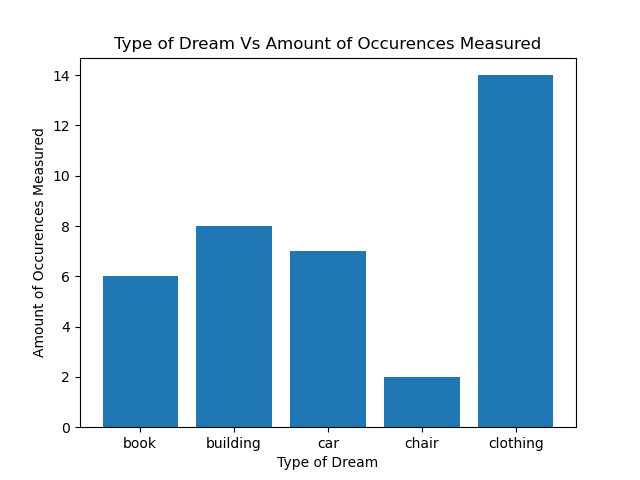

In [4]:
import matplotlib.pyplot as plt
   
dreams = ['book', 'building', 'car', 'chair', 'clothing']
dreams_amount = [6, 8, 7, 2, 14]

plt.bar(dreams, dreams_amount)
plt.title('Type of Dream Vs Amount of Occurences Measured')
plt.xlabel('Type of Dream')
plt.ylabel('Amount of Occurences Measured')
plt.show()

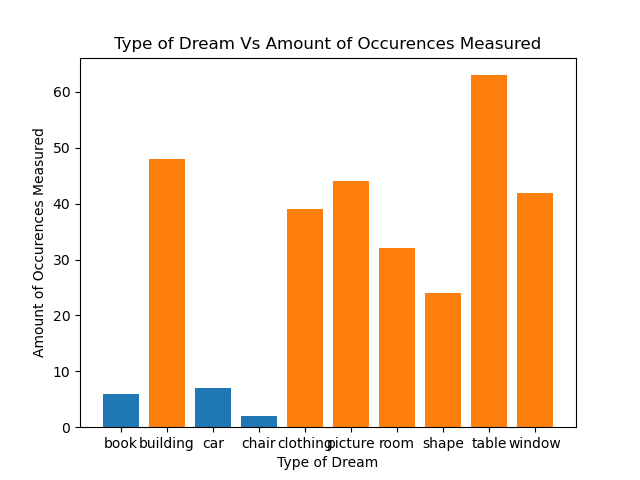

In [5]:
import matplotlib.pyplot as plt
   
dreams = ['building', 'clothing', 'picture', 'room', 'shape', 'table', 'window']
dreams_amount = [48, 39, 44, 32, 24, 63, 42]

plt.bar(dreams, dreams_amount)
plt.title('Type of Dream Vs Amount of Occurences Measured')
plt.xlabel('Type of Dream')
plt.ylabel('Amount of Occurences Measured')
plt.show()

I'm going to try to plot certain feature areas. Not sure if it'll work but it might be cool if it does

In [6]:
from utils import DataHandler, load_data
import numpy as np

masks, data = load_data(1)

ffa = masks.loc[:, "FFA"].astype(bool)
xyz = masks.loc[:, ["X", "Y", "Z"]]

xyz_ffa = xyz.loc[ffa]
nxyz_ffa = xyz.loc[~ffa]

print(xyz_ffa.shape)


(537, 3)


/tmp/ipykernel_124122/3844818350.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


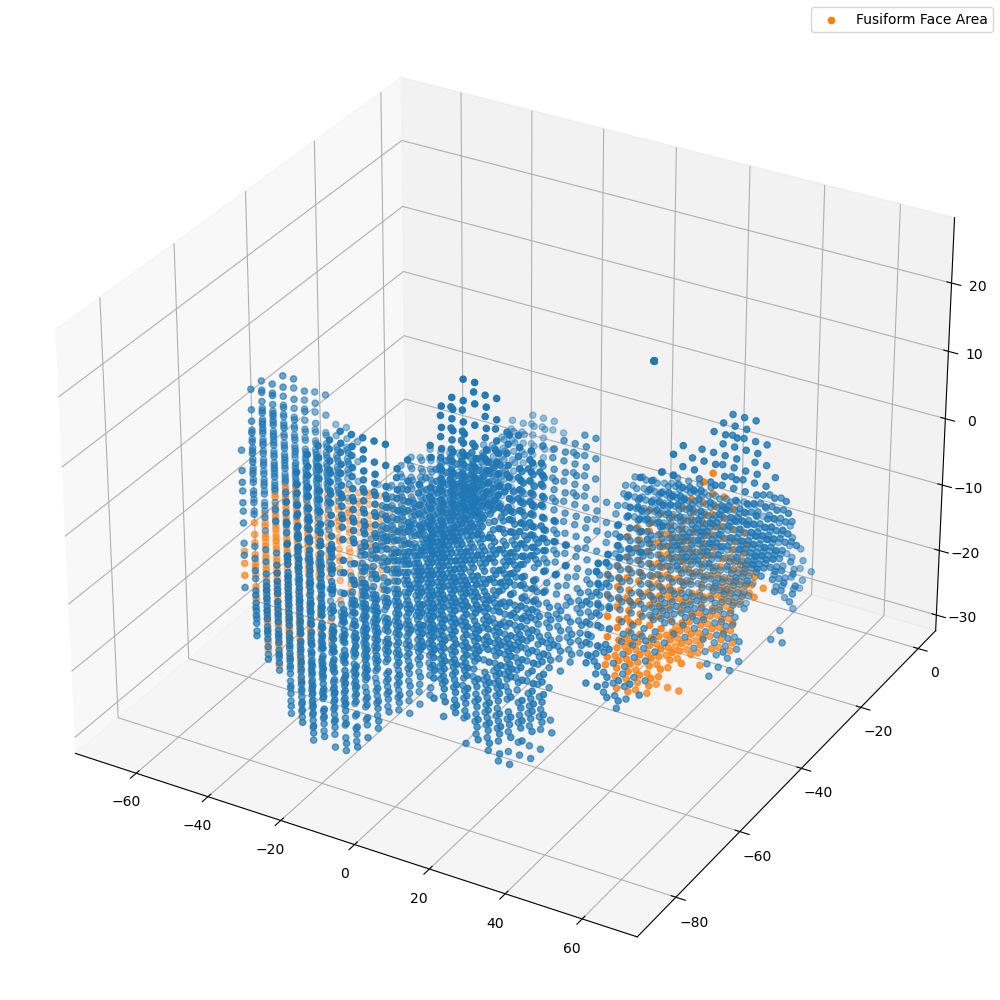

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(*nxyz_ffa.to_numpy().T, ".")
ax.scatter(*xyz_ffa.to_numpy().T, ".g", label = "Fusiform Face Area")

plt.legend()

Below we plot the feature regions, with color corresponding to the feature region and size corresponding to the intensity at that voxel for the indicated sample (or mean across all samples if "mean" is specified for sample_idx)

In [8]:
def get_region(masks, data, feature_region, rand_jitter = None, sample_idx = 0):
    # get coordinates, mask, and corresponding data
    xyz = masks.loc[:, ["X", "Y", "Z"]]
    mask = masks.loc[:, feature_region].astype(bool)
    if sample_idx == "mean":
        fdata = np.array(data[:, mask].mean(0)).squeeze()
    else:
        fdata = np.array(data[sample_idx, mask]).squeeze()
    
    # get specified region, convert to array, and optionally jitter
    region = xyz.loc[mask]
    region_arr = region.to_numpy()
    if rand_jitter is not None:
        region_arr = region_arr + np.random.uniform(high=rand_jitter, size=3)
    
    # return tuple of region coordinates and data
    return region_arr.T, fdata

def brain_plot(region_data, region_names, figsize = (10, 10), axis="on", size_scalar = 1):
    nregions = len(region_data)
    colors = [plt.get_cmap("tab10")(i) for i in range(nregions)]
    
    fig = plt.figure(figsize=figsize)
    ax = Axes3D(fig, auto_add_to_figure = False)
    fig.add_axes(ax)
    
    for i in range(nregions):
        region, fdata = region_data[i]
        ax.scatter(
            *region, 
            s = fdata*size_scalar, 
            color = colors[i], 
            label = region_names[i], 
            marker = "s"
        )
    # legend setting hack from: https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
    lgnd = ax.legend() 
    for i in range(nregions):
        lgnd.legendHandles[i]._sizes = [72.0]
    ax.axis(axis)

/home/emmaf/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


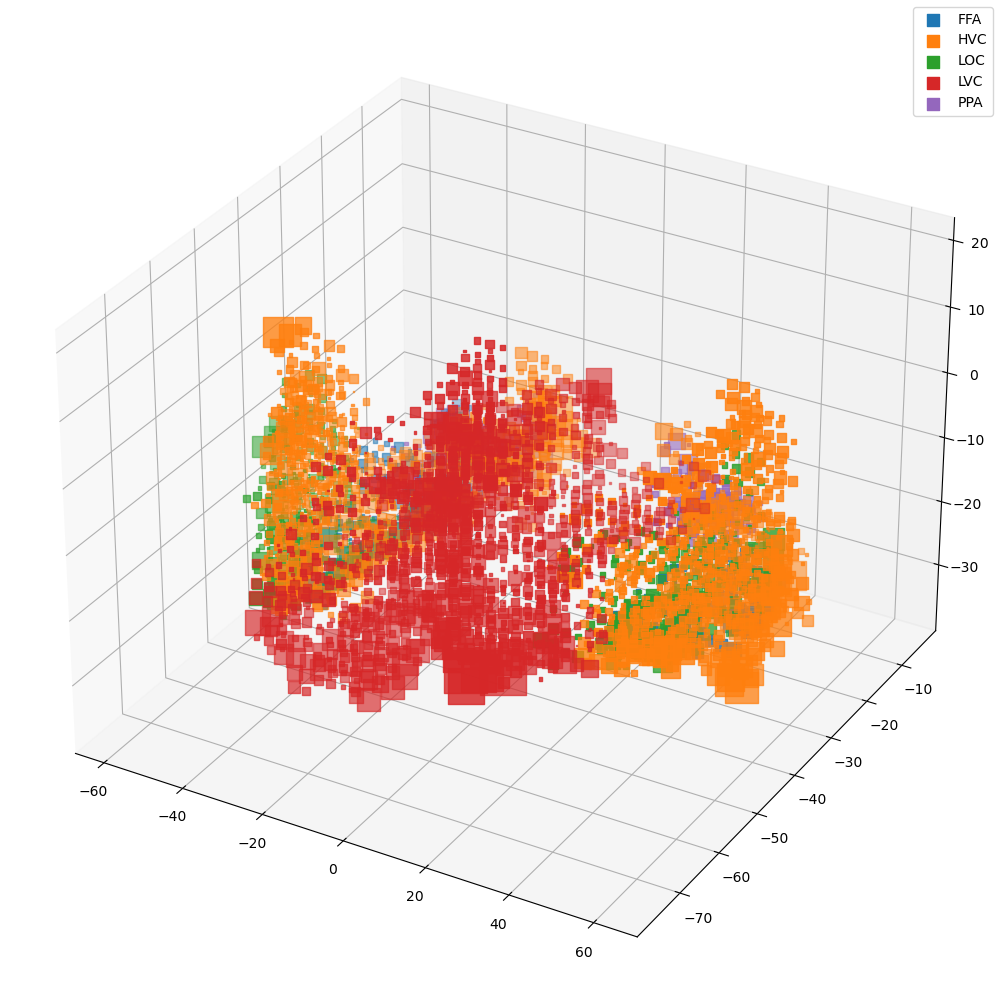

In [9]:
masks, data = load_data(3)

all_region_names = ["FFA", "HVC", "LOC", "LVC", "PPA"]
regions = [get_region(masks, data, region, rand_jitter=3, sample_idx = 1) for region in all_region_names]
brain_plot(regions, all_region_names, axis = "on", size_scalar=20)

# quick plotting helper
def quick_brain_plot(
    subject, # 1,2,or 3
    all_region_names = ["FFA", "HVC", "LOC", "LVC", "PPA"], # which regions to plot
    rand_jitter = 3, # how much to jitter points by (if None, don't jitter)
    sample_idx = 0, # index of the sample entry, if "mean", use the mean of all samples
    figsize = (10, 10), # figsize
    axis = "on", # "on" or "off" depending on whether to display the axis
    size_scalar=10 # a number to scale the size by
):
    masks, data = load_data(subject)

    regions = [get_region(masks, data, region, rand_jitter=rand_jitter, sample_idx = sample_idx) for region in all_region_names]
    brain_plot(regions, all_region_names, figsize = figsize, axis = axis, size_scalar=size_scalar)


Below is a demonstration of the helper function. The defaults are set to be decent values, but they can be tweaked for better visualizations as there is a large amount of variance between subjects and samples. IDK how to get rid of the warning without making it so the legend is all wacky sizes

Unfortunately, this doesn't work interactively unless imported within the notebook, so I can't export these to a file

/home/emmaf/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/emmaf/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


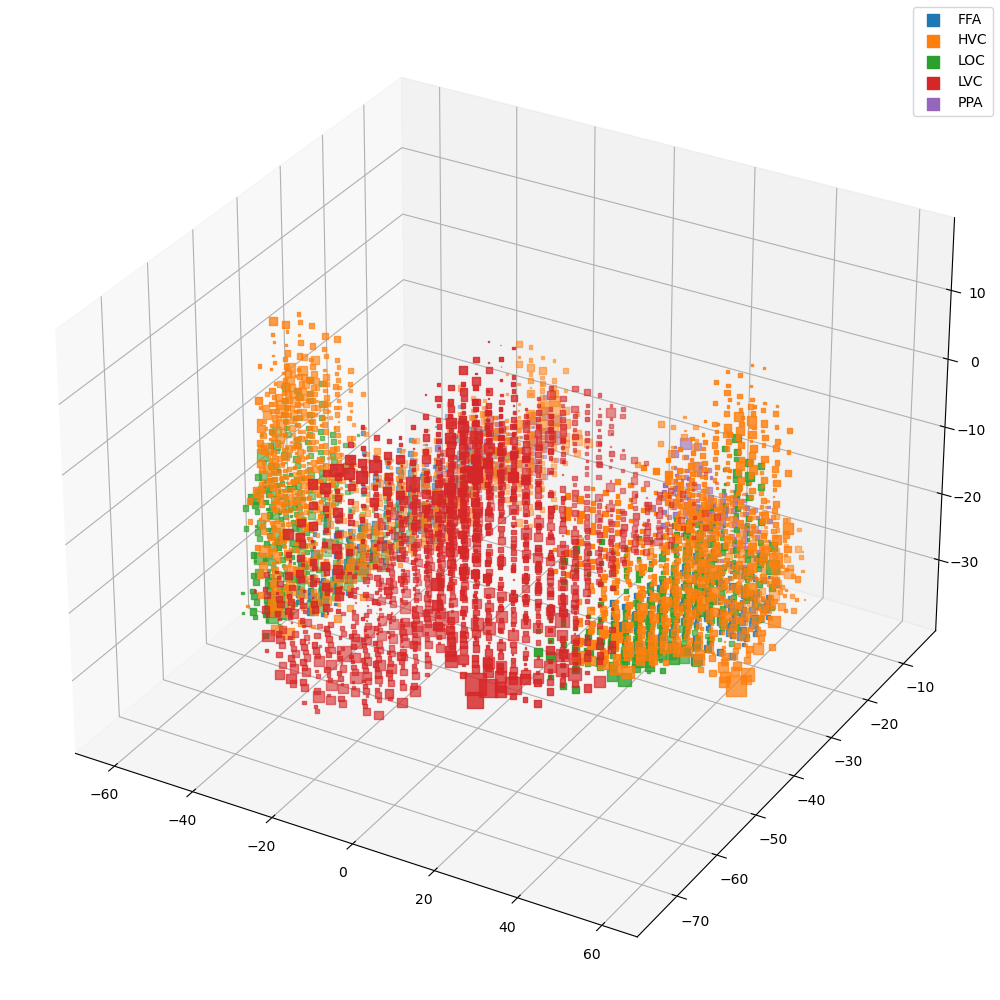

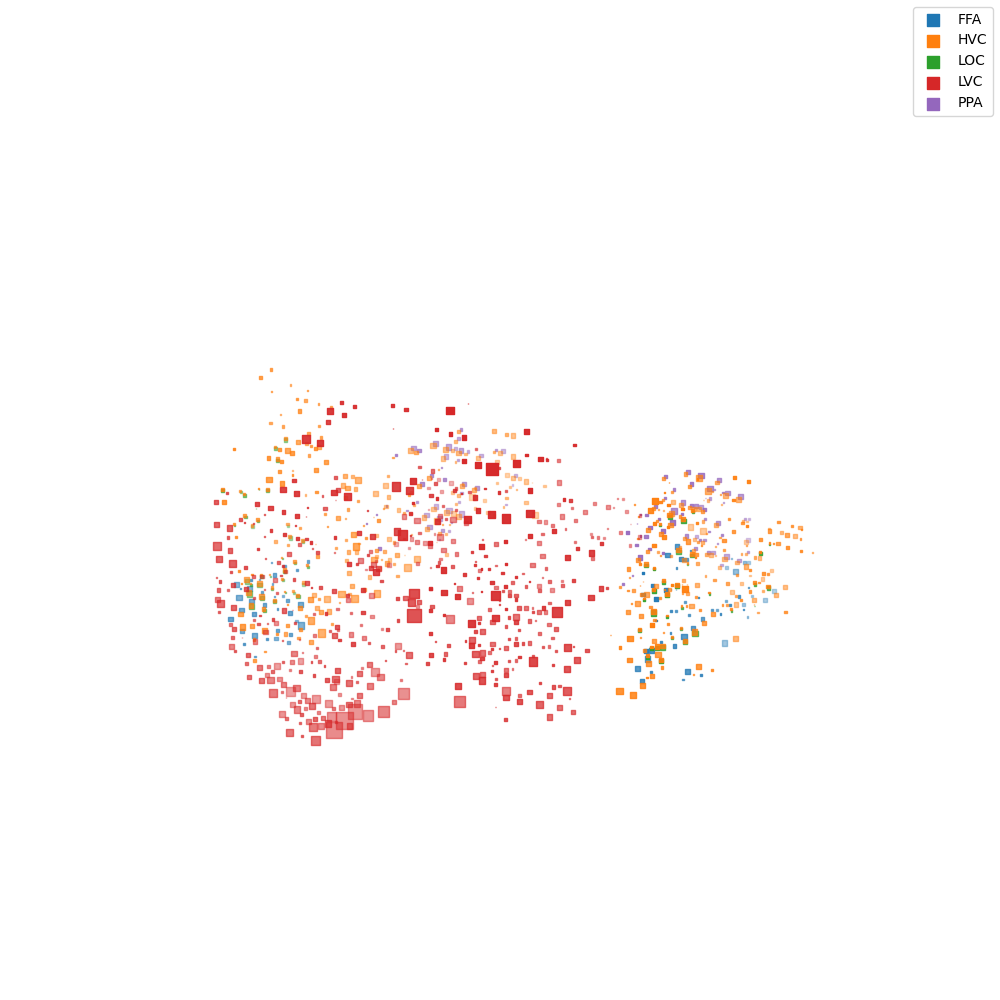

In [10]:
quick_brain_plot(3)
quick_brain_plot(2, axis="off")